In [1]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib

2022-11-15 20:47:14.104878: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 20:47:14.322857: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-15 20:47:14.388431: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 20:47:15.119535: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [3]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

linear_model, lstm_model, dnn_model, df_all_chan, das_data_all, f  = d2d.import_data(filename = file)

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=200,
                                                label_width=1, 
                                                shift=0,
                                                label_columns=['Discharge'],
                                                input_columns=list(np.arange(0,2308,1)),
                                                shuffle=True,
                                                batch_size=32)



Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
2308


In [8]:
normed_das = (das_data_all[:,0:2308] - multi_step_window_shuffled.chan_mean)/multi_step_window_shuffled.chan_std

times_for_dis = matplotlib.dates.date2num(f['Times'][:])

temp = pd.read_pickle(r'temp_array.pkl')
dates_for_temp = pd.read_pickle(r'dates_4_temp.pkl')
precip =  pd.read_pickle(r'precip_mm.pkl')

times = times_for_dis
precip_per_hour = [i * 6 for i in precip]

In [9]:
diff_in_alt = .9405 #km
lapse_rate_corr = 3.28 #celcius/1000m
new_temp = (np.asarray(temp) - (lapse_rate_corr)*diff_in_alt)


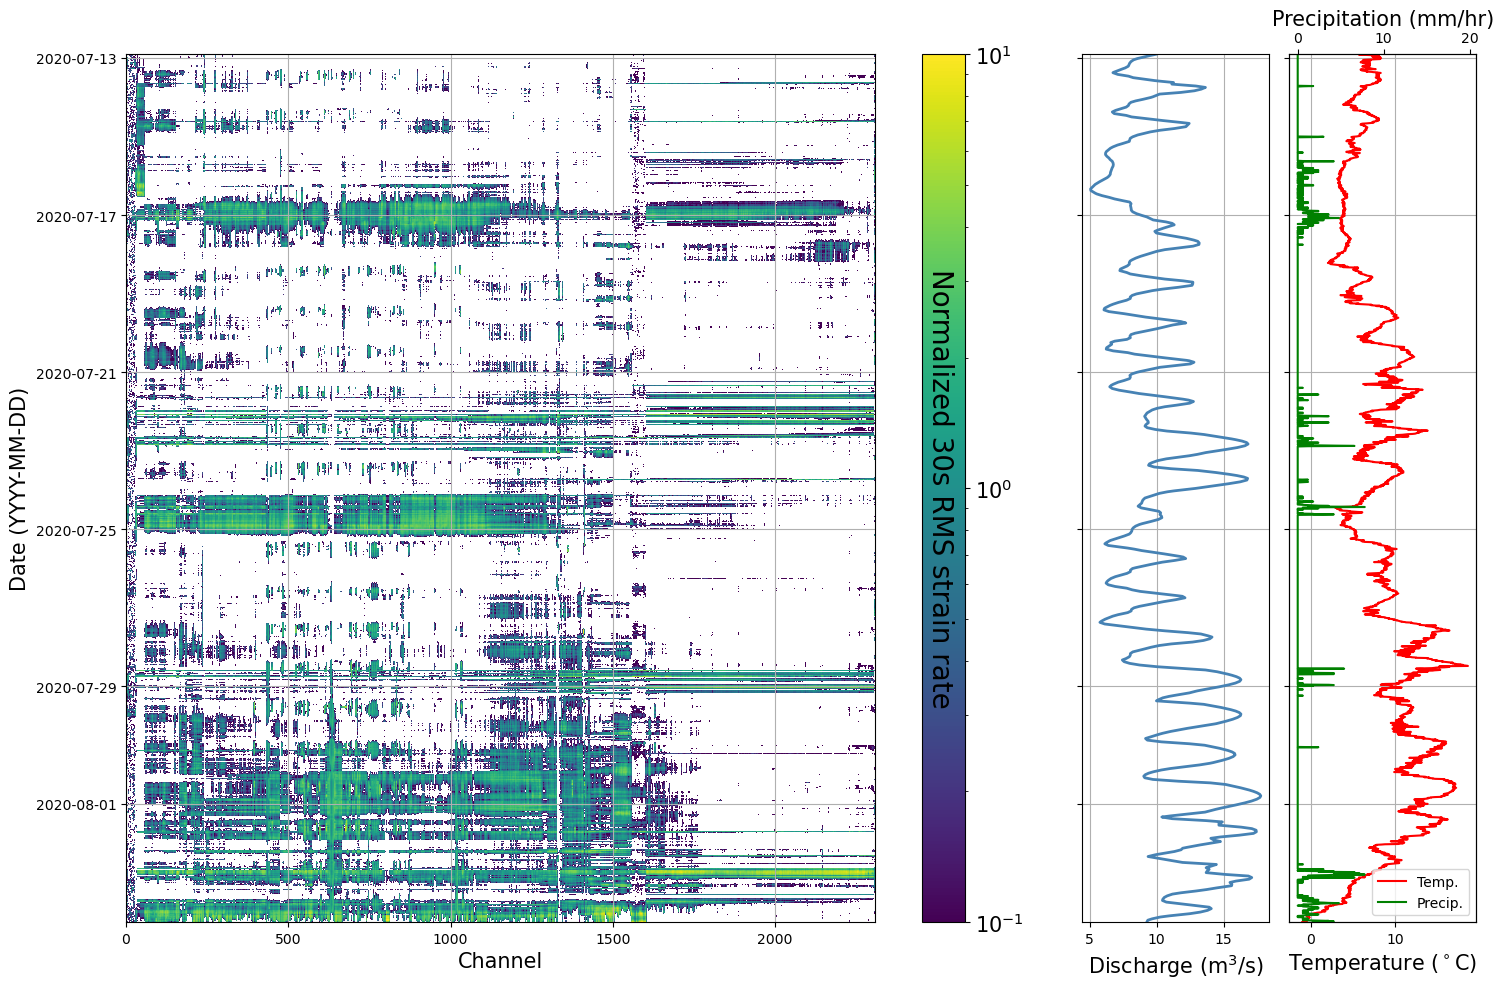

In [10]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib notebook

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols =3, figsize = [15,10], gridspec_kw={'width_ratios': [5, 1, 1]})
#fig.suptitle('DAS Deployment on Rhonegletscher, Switzerland', size = 20)
fig.patch.set_facecolor('white')

im = ax1.imshow(normed_das, aspect='auto', norm=matplotlib.colors.LogNorm(vmin = 0.1, vmax = 10), extent = [0, 2308,  times[-1], times[0]]) 
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('Normalized 30s RMS strain rate', rotation = '270', labelpad = -50, size = 20)
cbar.ax.tick_params(labelsize=15)
ax1.grid()
ax1.set_xlabel('Channel', size = 15)
ax1.set_ylabel('Date (YYYY-MM-DD)', size = 15)
ax1.yaxis_date()
ax1.set_facecolor("white")

ax2.plot(f['Discharge'][:], times, c='steelblue', lw=2)
ax2.yaxis_date()
ax2.set_ylim([times[0],times[-1]])
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.set_xlabel('Discharge (m$^3$/s)', size = 15)
ax2.set_yticklabels([])
ax2.grid()

ax3.plot(new_temp, dates_for_temp, color='red', label='Temp.')
ax3.yaxis_date()
ax3.set_ylim([times[0],times[-1]])
ax3.set_ylim(ax3.get_ylim()[::-1])
ax3.set_xlabel('Temperature ($^\circ$C)', size=15)
ax3.set_yticklabels([])
ax3.grid()

ax4 = ax3.twiny()
ax4.plot(precip_per_hour, dates_for_temp, color='green', label='Precip.')
ax4.set_xlabel('Precipitation (mm/hr)', size=15)

lines, labels = ax3.get_legend_handles_labels()
lines2, labels2 = ax4.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2)

plt.tight_layout()
plt.show()
#fig.savefig('DAS_discharge_temp_precip_fig_final.pdf', facecolor='w', dpi=1200)